In [1]:
import muspy as mp
import sys

sys.path.append(sys.path[0] + "/..")
import lib.prd as prd
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ds_muspy = mp.datasets.EssenFolkSongDatabase("../data")
len(ds_muspy)


# ds_prd = []
# fail_counter = 0
# nr = 9
# for i, music in enumerate(ds_muspy):
#     try:
#         track_prd = prd.from_muspy(music)
#     except Exception:
#         continue
#     else:
#         ds_prd.append(torch.tensor(track_prd))
# print(f"successfully converted: {len(ds_prd)}/{len(ds_muspy)}")

9034

In [43]:
from collections import Counter

def duration_set(music):
    return tuple(sorted(list(set(n.duration for n in music.tracks[0].notes))))

duration_collections = Counter((duration_set(music) for music in ds_muspy))

In [57]:
for durs, count in dict(sorted(duration_collections.items(), key=lambda item: item[1], reverse=True)).items():
    print(f"{count:5} {durs}")

  951 (12, 24, 36, 48)
  893 (6, 12, 18, 24)
  812 (12, 24)
  681 (12, 24, 36)
  607 (12, 24, 48)
  590 (6, 12, 18, 24, 36)
  569 (6, 12, 18, 24, 36, 48)
  564 (6, 12, 24)
  329 (6, 12, 18, 24, 48)
  293 (6, 12, 24, 36)
  226 (12, 24, 36, 48, 72)
  174 (24, 48)
  154 (6, 12, 24, 36, 48)
  118 (12, 24, 48, 72)
  117 (6, 12, 24, 48)
   95 (24, 48, 72)
   83 (24, 48, 72, 96, 144)
   69 (6, 12, 18, 24, 36, 48, 72)
   69 (48, 96, 144)
   58 (12, 24, 36, 48, 96)
   58 (24, 48, 72, 96)
   51 (24, 48, 96)
   51 (48, 96)
   43 (6, 12, 18)
   35 (6, 8, 12, 18, 24, 36, 48)
   35 (8, 12, 24)
   35 (24, 48, 72, 96, 192)
   34 (6, 12)
   32 (48, 96, 144, 192)
   31 (6, 12, 18, 24, 36, 60)
   29 (12, 24, 36, 48, 72, 96)
   29 (12, 24, 36, 72)
   25 (12, 24, 48, 96)
   24 (6, 12, 18, 24, 36, 48, 60)
   24 (48, 96, 192)
   21 (8, 12, 24, 36)
   21 (24, 48, 72, 96, 144, 192)
   20 (12, 24, 36, 60)
   18 (12, 24, 48, 72, 96)
   18 (12, 24, 72)
   18 (8, 12, 24, 36, 48)
   18 (24, 48, 96, 144)
   17 (3, 6

In [56]:
ds_muspy
mp.scale_consistency(ds_muspy[100])
    

min((mp.scale_consistency(music) for music in ds_muspy))

0.7

In [45]:


len(duration_collections)

397

In [4]:
dataset = prd.DatasetPRD(ds_prd)

(tensor([[129,   1],
         [ 82,   9],
         [ 79,   9],
         [ 77,  15],
         [ 82,   9],
         [ 79,   9],
         [ 77,   9],
         [ 82,   9],
         [ 72,   6],
         [ 77,   6],
         [ 72,   6],
         [ 82,   6],
         [ 79,   9],
         [ 77,   9],
         [ 77,  19],
         [ 82,   6]]),
 tensor([[ 72,   6],
         [ 77,   9],
         [ 82,   6],
         [ 79,   6],
         [ 77,   9],
         [ 75,   9],
         [ 77,  15],
         [ 72,   9],
         [ 82,   9],
         [ 72,   6],
         [ 74,   6],
         [ 72,   6],
         [ 82,   6],
         [ 79,   9],
         [ 77,  19],
         [ 77,  15],
         [130,   2]]))

In [5]:
pitch_count = torch.zeros(131)

for tune in dataset.tunes:
    for i in range(tune.shape[0]):
        pitch_count[tune[i, 0]] += 1

In [17]:
pitch_count.topk(5)

torch.return_types.topk(
values=tensor([71599., 59343., 51202., 46850., 45935.]),
indices=tensor([69, 67, 72, 74, 71]))

<BarContainer object of 131 artists>

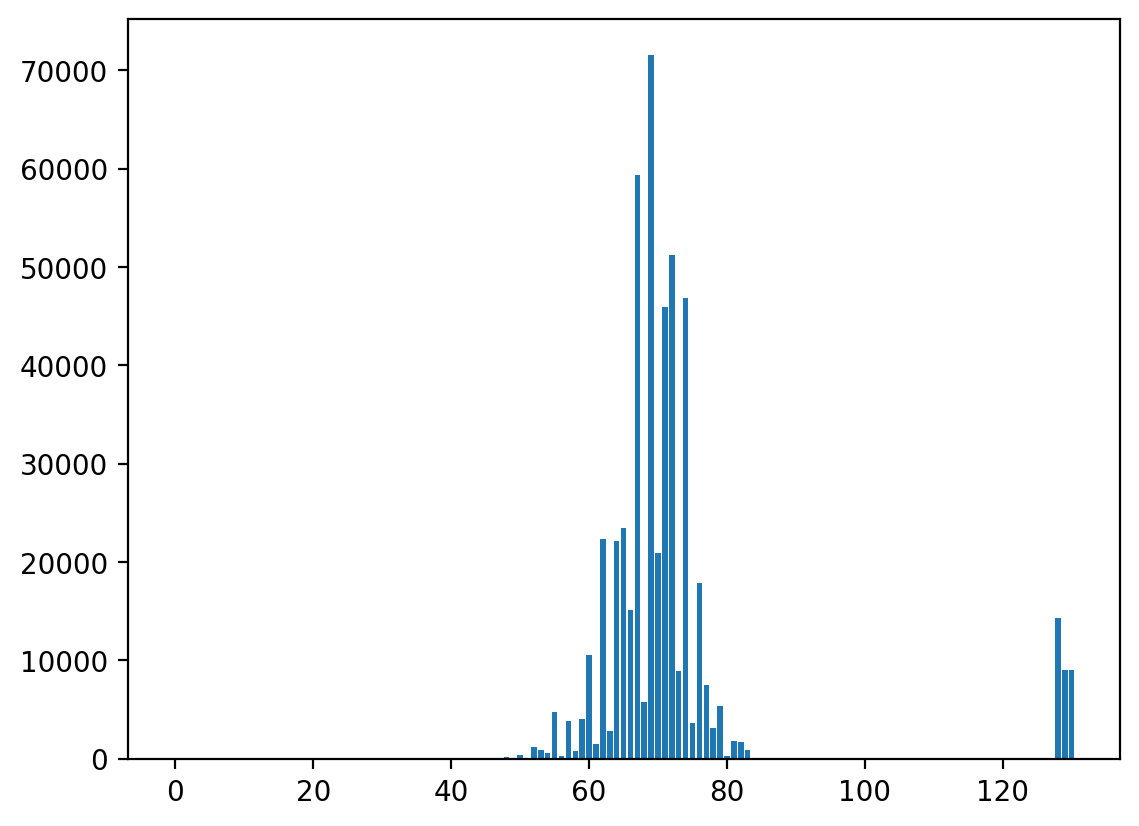

In [16]:
plt.bar(np.arange(len(pitch_count)), pitch_count.detach().numpy())

In [23]:
transposed_pitch_count = torch.zeros(131)

for x, y in prd.DatasetPRD(ds_prd, xy_split=[1, 1], trnasposition_augment_range=[-6, 6]):
    for i in range(x.shape[0]):
        transposed_pitch_count[x[i, 0]] += 1

<BarContainer object of 131 artists>

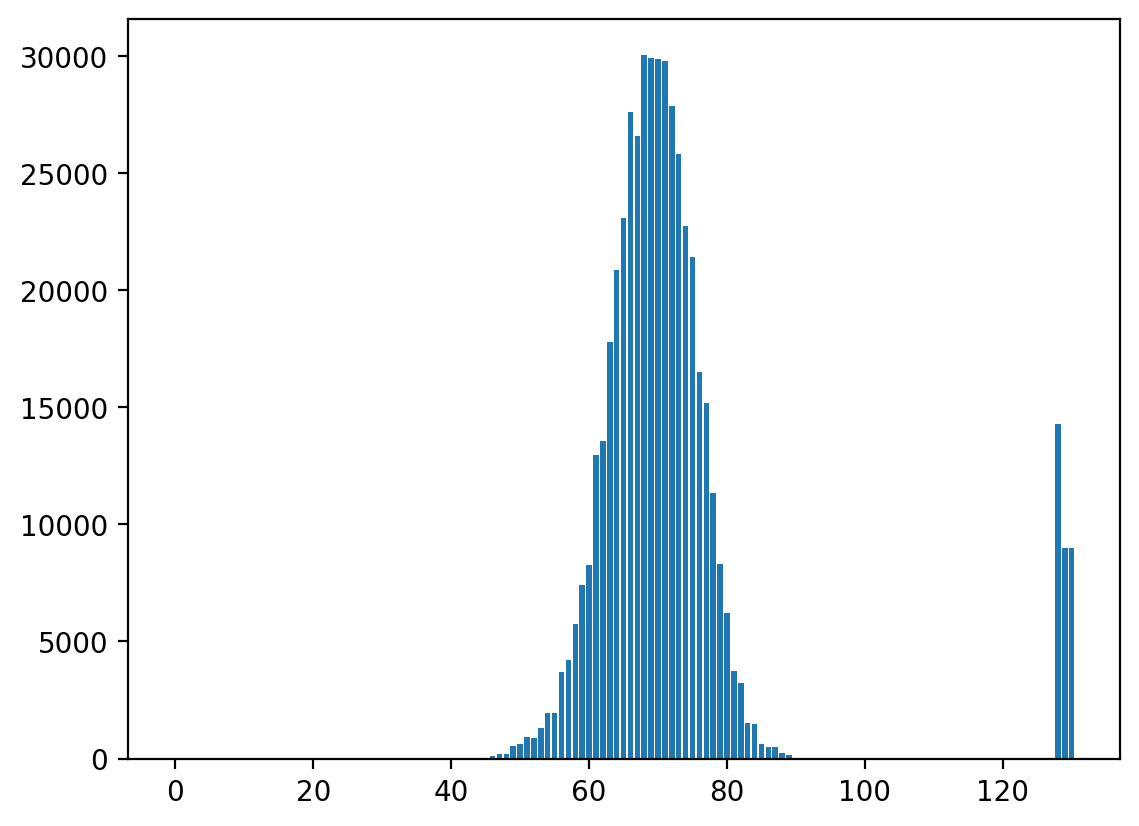

In [25]:
plt.bar(np.arange(len(pitch_count)), transposed_pitch_count)

In [26]:
transposed_pitch_count = torch.zeros(131)

for x, y in prd.DatasetPRD(ds_prd, xy_split=[1, 1], trnasposition_augment_range=[-18, 18]):
    for i in range(x.shape[0]):
        transposed_pitch_count[x[i, 0]] += 1

<BarContainer object of 131 artists>

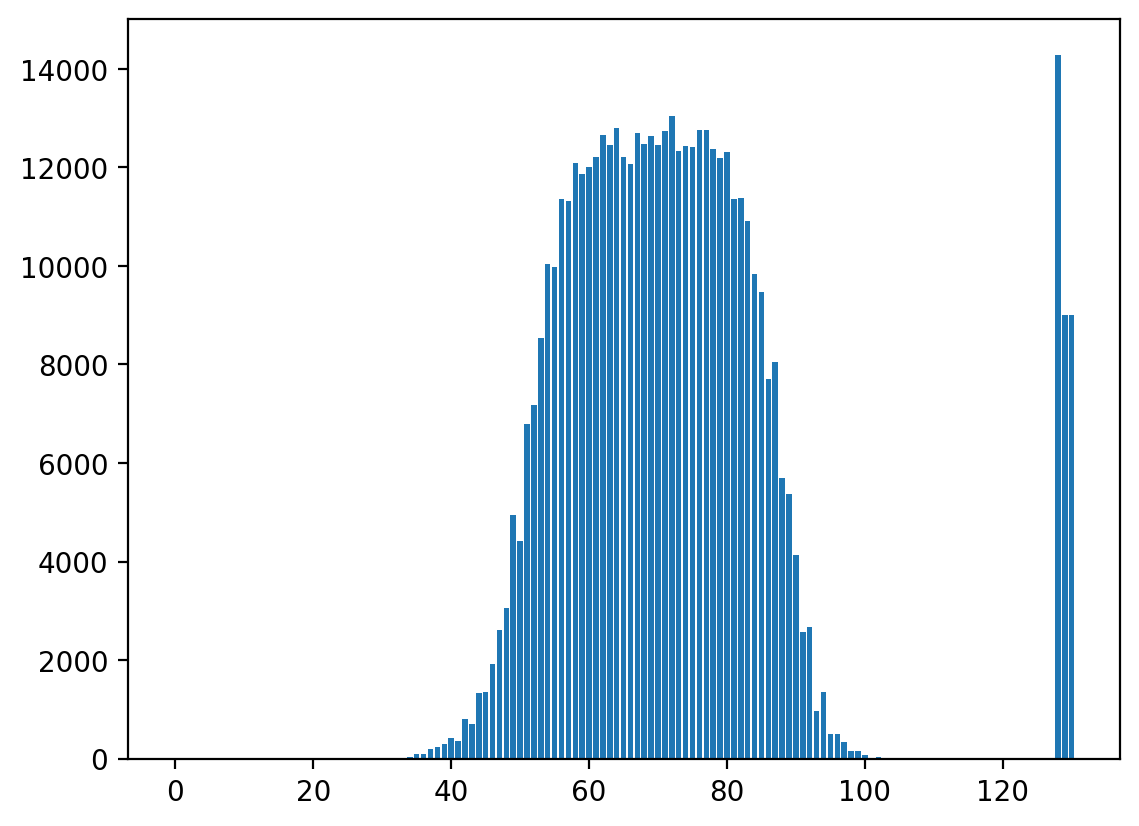

In [27]:
plt.bar(np.arange(len(pitch_count)), transposed_pitch_count)